<a href="https://colab.research.google.com/github/racheltr248/final_project_rtr/blob/main/anime_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import csv and basic clean up

In [2]:
# import anime csv
url = 'https://raw.githubusercontent.com/Megreid23/final_project/main/anime.csv'
anime_df = pd.read_csv(url)
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1871705,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1509622,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' re...,https://cdn.myanimelist.net/images/anime/5/731...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.95,1398608,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Winner of the Excellence Award on the 20th Jap...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [3]:
# drop columns that are not useful for analysis or don't have enough information
anime_df.drop(columns = [
    'start_date',
    'end_date',
    'episode_duration',
    'total_duration',
    'approved',
    'created_at',
    'updated_at',
    'real_start_date',
    'real_end_date',
    'broadcast_day',
    'broadcast_time',
    'licensors',
    'synopsis',
    'background',
    'main_picture',
    'url',
    'trailer_url',
    'title_english',
    'title_japanese',
    'title_synonyms'
], inplace=True)
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1871705,finished_airing,64.0,manga,2932347,204645,r,True,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,9.04,1509622,finished_airing,148.0,manga,2418883,185178,pg_13,True,2011.0,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,manga,1881734,51931,r,True,2019.0,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,visual_novel,2269121,173088,pg_13,True,2011.0,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,8.95,1398608,finished_airing,1.0,manga,2001335,77431,pg_13,True,2016.0,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24165 entries, 0 to 24164
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24165 non-null  int64  
 1   title         24165 non-null  object 
 2   type          24092 non-null  object 
 3   score         14272 non-null  float64
 4   scored_by     24165 non-null  int64  
 5   status        24165 non-null  object 
 6   episodes      23397 non-null  float64
 7   source        20404 non-null  object 
 8   members       24165 non-null  int64  
 9   favorites     24165 non-null  int64  
 10  rating        23148 non-null  object 
 11  sfw           24165 non-null  bool   
 12  start_year    17749 non-null  float64
 13  start_season  17749 non-null  object 
 14  genres        24165 non-null  object 
 15  themes        24165 non-null  object 
 16  demographics  24165 non-null  object 
 17  studios       24165 non-null  object 
 18  producers     24165 non-nu

In [5]:
# source value counts for binning
source_counts = anime_df['source'].value_counts()
source_counts

original        9438
manga           4427
game            1167
visual_novel    1104
other            973
light_novel      897
novel            704
music            403
web_manga        344
4_koma_manga     311
book             209
picture_book     190
mixed_media      101
card_game         67
web_novel         56
radio             13
Name: source, dtype: int64

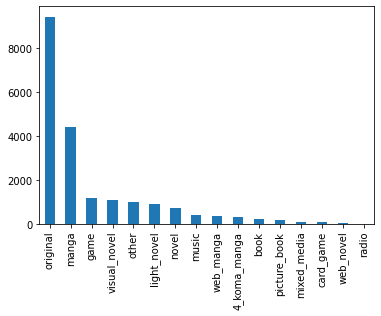

In [6]:
# visualize sources
ax = source_counts.plot.bar(x='source')

In [7]:
# bin sources into orginal and non-original
x = {'x': 'Orginal'}
anime_df = anime_df.replace(x)

x = dict.fromkeys(['manga', 'game', 'visual_novel', 'other', 'light_novel',
  'novel', 'music', 'web_manga', '4_koma_manga', 'book', 'picture_book',
  'mixed_media', 'card_game', 'web_novel', 'radio'], 'Non-Original')
anime_df = anime_df.replace(x)
anime_df['source'].value_counts()

Non-Original    10966
original         9438
Name: source, dtype: int64

In [8]:
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1871705,finished_airing,64.0,Non-Original,2932347,204645,r,True,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,9.04,1509622,finished_airing,148.0,Non-Original,2418883,185178,pg_13,True,2011.0,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,Non-Original,1881734,51931,r,True,2019.0,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,Non-Original,2269121,173088,pg_13,True,2011.0,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,8.95,1398608,finished_airing,1.0,Non-Original,2001335,77431,pg_13,True,2016.0,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [9]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24165 entries, 0 to 24164
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24165 non-null  int64  
 1   title         24165 non-null  object 
 2   type          24092 non-null  object 
 3   score         14272 non-null  float64
 4   scored_by     24165 non-null  int64  
 5   status        24165 non-null  object 
 6   episodes      23397 non-null  float64
 7   source        20404 non-null  object 
 8   members       24165 non-null  int64  
 9   favorites     24165 non-null  int64  
 10  rating        23148 non-null  object 
 11  sfw           24165 non-null  bool   
 12  start_year    17749 non-null  float64
 13  start_season  17749 non-null  object 
 14  genres        24165 non-null  object 
 15  themes        24165 non-null  object 
 16  demographics  24165 non-null  object 
 17  studios       24165 non-null  object 
 18  producers     24165 non-nu

In [10]:
# find null values
for column in anime_df:
  print(f"{column} has {anime_df[column].isnull().sum()} null values")

anime_id has 0 null values
title has 0 null values
type has 73 null values
score has 9893 null values
scored_by has 0 null values
status has 0 null values
episodes has 768 null values
source has 3761 null values
members has 0 null values
favorites has 0 null values
rating has 1017 null values
sfw has 0 null values
start_year has 6416 null values
start_season has 6416 null values
genres has 0 null values
themes has 0 null values
demographics has 0 null values
studios has 0 null values
producers has 0 null values


In [11]:
# start by dropping null scores
anime_df.dropna(subset=['score'], inplace=True)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14272 entries, 0 to 14271
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      14272 non-null  int64  
 1   title         14272 non-null  object 
 2   type          14271 non-null  object 
 3   score         14272 non-null  float64
 4   scored_by     14272 non-null  int64  
 5   status        14272 non-null  object 
 6   episodes      14178 non-null  float64
 7   source        12516 non-null  object 
 8   members       14272 non-null  int64  
 9   favorites     14272 non-null  int64  
 10  rating        14176 non-null  object 
 11  sfw           14272 non-null  bool   
 12  start_year    13561 non-null  float64
 13  start_season  13561 non-null  object 
 14  genres        14272 non-null  object 
 15  themes        14272 non-null  object 
 16  demographics  14272 non-null  object 
 17  studios       14272 non-null  object 
 18  producers     14272 non-nu

In [12]:
# find null values
for column in anime_df:
  print(f"{column} has {anime_df[column].isnull().sum()} null values")

anime_id has 0 null values
title has 0 null values
type has 1 null values
score has 0 null values
scored_by has 0 null values
status has 0 null values
episodes has 94 null values
source has 1756 null values
members has 0 null values
favorites has 0 null values
rating has 96 null values
sfw has 0 null values
start_year has 711 null values
start_season has 711 null values
genres has 0 null values
themes has 0 null values
demographics has 0 null values
studios has 0 null values
producers has 0 null values


In [13]:
# drop remaining null values and confirm removal
anime_df.dropna(inplace=True)
for column in anime_df:
    print(f"{column} has {anime_df[column].isnull().sum()} null values")

anime_id has 0 null values
title has 0 null values
type has 0 null values
score has 0 null values
scored_by has 0 null values
status has 0 null values
episodes has 0 null values
source has 0 null values
members has 0 null values
favorites has 0 null values
rating has 0 null values
sfw has 0 null values
start_year has 0 null values
start_season has 0 null values
genres has 0 null values
themes has 0 null values
demographics has 0 null values
studios has 0 null values
producers has 0 null values


In [14]:
# convert score float values to whole numbers
anime_df['score'] = anime_df['score'].astype(int)
anime_df['score'].value_counts()

6    4915
7    3361
5    2580
8     561
4     344
3      42
9      11
2       8
1       1
Name: score, dtype: int64

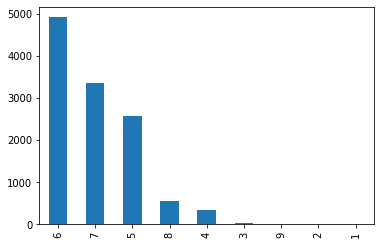

In [15]:
# visualize score counts
score_counts = anime_df['score'].value_counts()
ax = score_counts.plot.bar(x='score')

In [16]:
# bin scores into high, medium, and low
score_bins = [0, 4, 6, 9]
bin_names = ["Low (<4)", "Medium (5-6)", "High (7-9)"]
anime_df['score'] = pd.cut(anime_df['score'], score_bins, labels=bin_names)
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64.0,Non-Original,2932347,204645,r,True,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148.0,Non-Original,2418883,185178,pg_13,True,2011.0,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10.0,Non-Original,1881734,51931,r,True,2019.0,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24.0,Non-Original,2269121,173088,pg_13,True,2011.0,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1.0,Non-Original,2001335,77431,pg_13,True,2016.0,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [17]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      11823 non-null  int64   
 1   title         11823 non-null  object  
 2   type          11823 non-null  object  
 3   score         11823 non-null  category
 4   scored_by     11823 non-null  int64   
 5   status        11823 non-null  object  
 6   episodes      11823 non-null  float64 
 7   source        11823 non-null  object  
 8   members       11823 non-null  int64   
 9   favorites     11823 non-null  int64   
 10  rating        11823 non-null  object  
 11  sfw           11823 non-null  bool    
 12  start_year    11823 non-null  float64 
 13  start_season  11823 non-null  object  
 14  genres        11823 non-null  object  
 15  themes        11823 non-null  object  
 16  demographics  11823 non-null  object  
 17  studios       11823 non-null  object  
 18  produc

In [18]:
# convert episode float values to whole numbers
anime_df['episodes'] = anime_df['episodes'].astype(int)
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011.0,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019.0,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011.0,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016.0,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [19]:
# convert start_year float values to whole numbers
anime_df['start_year'] = anime_df['start_year'].astype(int)
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [20]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      11823 non-null  int64   
 1   title         11823 non-null  object  
 2   type          11823 non-null  object  
 3   score         11823 non-null  category
 4   scored_by     11823 non-null  int64   
 5   status        11823 non-null  object  
 6   episodes      11823 non-null  int64   
 7   source        11823 non-null  object  
 8   members       11823 non-null  int64   
 9   favorites     11823 non-null  int64   
 10  rating        11823 non-null  object  
 11  sfw           11823 non-null  bool    
 12  start_year    11823 non-null  int64   
 13  start_season  11823 non-null  object  
 14  genres        11823 non-null  object  
 15  themes        11823 non-null  object  
 16  demographics  11823 non-null  object  
 17  studios       11823 non-null  object  
 18  produc

# fix genres, themes, demographics, studios, producers columns

In [21]:
genres_df = anime_df[['anime_id', 'genres']]
genres_df.head()

,anime_id,genres
0,5114,"['Action', 'Adventure', 'Drama', 'Fantasy']"
1,11061,"['Action', 'Adventure', 'Fantasy']"
2,38524,"['Action', 'Drama']"
3,9253,"['Drama', 'Sci-Fi', 'Suspense']"
4,28851,['Drama']


In [22]:
themes_df = anime_df[['anime_id', 'themes']]
themes_df.head()

,anime_id,themes
0,5114,['Military']
1,11061,[]
2,38524,"['Gore', 'Military', 'Survival']"
3,9253,"['Psychological', 'Time Travel']"
4,28851,['Romantic Subtext']


In [23]:
demographics_df = anime_df[['anime_id', 'demographics']]
demographics_df.head()

,anime_id,demographics
0,5114,['Shounen']
1,11061,['Shounen']
2,38524,['Shounen']
3,9253,[]
4,28851,['Shounen']


In [24]:
studios_df = anime_df[['anime_id', 'studios']]
studios_df.head()

,anime_id,studios
0,5114,['Bones']
1,11061,['Madhouse']
2,38524,['Wit Studio']
3,9253,['White Fox']
4,28851,['Kyoto Animation']


In [25]:
producers_df = anime_df[['anime_id', 'producers']]
producers_df.head()

,anime_id,producers
0,5114,"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


# fix genres

In [26]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  11823 non-null  int64 
 1   genres    11823 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.1+ KB


In [27]:
# convert list-like object columns into lists
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
genres_df['genres'] = genres_df['genres'].apply(eval)
genres_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,anime_id,genres
0,5114,"[Action, Adventure, Drama, Fantasy]"
1,11061,"[Action, Adventure, Fantasy]"
2,38524,"[Action, Drama]"
3,9253,"[Drama, Sci-Fi, Suspense]"
4,28851,[Drama]


In [28]:
# separate list-like column into separate columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
genres_df = genres_df['genres'].apply(pd.Series)
genres_df

,0,1,2,3,4,5,6,7,8
0,Action,Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN
1,Action,Adventure,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN
2,Action,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Drama,Sci-Fi,Suspense,NaN,NaN,NaN,NaN,NaN,NaN
4,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14266,Slice of Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10728 non-null  object
 1   1       7096 non-null   object
 2   2       3954 non-null   object
 3   3       1460 non-null   object
 4   4       395 non-null    object
 5   5       84 non-null     object
 6   6       15 non-null     object
 7   7       1 non-null      object
 8   8       1 non-null      object
dtypes: object(9)
memory usage: 923.7+ KB


In [30]:
# find null values
for column in genres_df:
  print(f"{column} has {genres_df[column].isnull().sum()} null values")

0 has 1095 null values
1 has 4727 null values
2 has 7869 null values
3 has 10363 null values
4 has 11428 null values
5 has 11739 null values
6 has 11808 null values
7 has 11822 null values
8 has 11822 null values


In [31]:
# drop all but first column
genres_df = genres_df.drop(columns = [1, 2, 3, 4, 5, 6, 7, 8])
genres_df.head()

,0
0,Action
1,Action
2,Action
3,Drama
4,Drama


In [32]:
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [33]:
# replace original genres values in anime_df with genres values in genres_df
# example 4 https://www.geeksforgeeks.org/replace-values-of-a-dataframe-with-the-value-of-another-dataframe-in-pandas/
anime_df['genres'] = genres_df.replace(anime_df['genres'], genres_df[0])
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,themes,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,"['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,"['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


# fix themes

In [34]:
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  11823 non-null  int64 
 1   themes    11823 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.1+ KB


In [35]:
# convert list-like object columns into lists
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
themes_df['themes'] = themes_df['themes'].apply(eval)
themes_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,anime_id,themes
0,5114,[Military]
1,11061,[]
2,38524,"[Gore, Military, Survival]"
3,9253,"[Psychological, Time Travel]"
4,28851,[Romantic Subtext]


In [36]:
# separate list-like column into separate columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
themes_df = themes_df['themes'].apply(pd.Series)
themes_df

,0,1,2,3,4
0,Military,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Gore,Military,Survival,NaN,NaN
3,Psychological,Time Travel,NaN,NaN,NaN
4,Romantic Subtext,NaN,NaN,NaN,NaN
...,...,...,...,...,...
14266,NaN,NaN,NaN,NaN,NaN
14267,Music,NaN,NaN,NaN,NaN
14268,Music,NaN,NaN,NaN,NaN
14269,Music,NaN,NaN,NaN,NaN


In [37]:
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7392 non-null   object
 1   1       2908 non-null   object
 2   2       794 non-null    object
 3   3       160 non-null    object
 4   4       12 non-null     object
dtypes: object(5)
memory usage: 812.2+ KB


In [38]:
# find null values
for column in themes_df:
  print(f"{column} has {themes_df[column].isnull().sum()} null values")

0 has 4431 null values
1 has 8915 null values
2 has 11029 null values
3 has 11663 null values
4 has 11811 null values


In [39]:
# that's a lot of null values (4431 at minimum) and we have a great number of genres
# drop themes column from anime_df

In [40]:
anime_df = anime_df.drop(columns = ['themes'])
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


# fix demographics

In [41]:
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      11823 non-null  int64 
 1   demographics  11823 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.1+ KB


In [42]:
# convert list-like object columns into lists
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
demographics_df['demographics'] = demographics_df['demographics'].apply(eval)
demographics_df.head()

,anime_id,demographics
0,5114,[Shounen]
1,11061,[Shounen]
2,38524,[Shounen]
3,9253,[]
4,28851,[Shounen]


In [43]:
# separate list-like column into separate columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
demographics_df = demographics_df['demographics'].apply(pd.Series)
demographics_df

,0,1
0,Shounen,NaN
1,Shounen,NaN
2,Shounen,NaN
3,NaN,NaN
4,Shounen,NaN
...,...,...
14266,NaN,NaN
14267,NaN,NaN
14268,NaN,NaN
14269,NaN,NaN


In [44]:
# find null values
for column in demographics_df:
  print(f"{column} has {demographics_df[column].isnull().sum()} null values")

0 has 8221 null values
1 has 11774 null values


In [45]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 14270
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      11823 non-null  int64   
 1   title         11823 non-null  object  
 2   type          11823 non-null  object  
 3   score         11823 non-null  category
 4   scored_by     11823 non-null  int64   
 5   status        11823 non-null  object  
 6   episodes      11823 non-null  int64   
 7   source        11823 non-null  object  
 8   members       11823 non-null  int64   
 9   favorites     11823 non-null  int64   
 10  rating        11823 non-null  object  
 11  sfw           11823 non-null  bool    
 12  start_year    11823 non-null  int64   
 13  start_season  11823 non-null  object  
 14  genres        10728 non-null  object  
 15  demographics  11823 non-null  object  
 16  studios       11823 non-null  object  
 17  producers     11823 non-null  object  
dtypes: boo

In [46]:
# over 8000 null values in demographics which means less than 4000 have demographics
# could be dropped or could be replace with "none"

In [47]:
# drop all but first column
demographics_df = demographics_df.drop(columns = [1])
demographics_df.head()

,0
0,Shounen
1,Shounen
2,Shounen
3,NaN
4,Shounen


In [48]:
# replace original demographics values in anime_df with demographics values in demographics_df
# example 4 https://www.geeksforgeeks.org/replace-values-of-a-dataframe-with-the-value-of-another-dataframe-in-pandas/
anime_df['demographics'] = demographics_df.replace(anime_df['demographics'], demographics_df[0])
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,Shounen,['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,Shounen,['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,Shounen,['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,NaN,['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,Shounen,['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


# fix studios

In [49]:
# convert list-like object columns into lists
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
studios_df['studios'] = studios_df['studios'].apply(eval)
studios_df.head()

,anime_id,studios
0,5114,[Bones]
1,11061,[Madhouse]
2,38524,[Wit Studio]
3,9253,[White Fox]
4,28851,[Kyoto Animation]


In [50]:
# separate list-like column into separate columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
studios_df = studios_df['studios'].apply(pd.Series)
studios_df

,0,1,2,3,4,5,6,7,8,9
0,Bones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Madhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wit Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White Fox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kyoto Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# find null values
for column in studios_df:
  print(f"{column} has {studios_df[column].isnull().sum()} null values")

0 has 1946 null values
1 has 11035 null values
2 has 11762 null values
3 has 11809 null values
4 has 11817 null values
5 has 11819 null values
6 has 11819 null values
7 has 11822 null values
8 has 11822 null values
9 has 11822 null values


In [52]:
# drop all but first column
studios_df = studios_df.drop(columns = [1, 2, 3, 4, 5, 6, 7, 8, 9])
studios_df.head()

,0
0,Bones
1,Madhouse
2,Wit Studio
3,White Fox
4,Kyoto Animation


In [53]:
# almost 2000 null values, but there may be some crossover with nulls in other new columns
# replace original studios values in anime_df with studios values in studios_df
# example 4 https://www.geeksforgeeks.org/replace-values-of-a-dataframe-with-the-value-of-another-dataframe-in-pandas/
anime_df['studios'] = studios_df.replace(anime_df['studios'], studios_df[0])
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios,producers
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,Shounen,Bones,"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,Shounen,Madhouse,"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,Shounen,Wit Studio,"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,NaN,White Fox,"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,Shounen,Kyoto Animation,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


# fix producers

In [54]:
# convert list-like object columns into lists
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
producers_df['producers'] = producers_df['producers'].apply(eval)
producers_df.head()

,anime_id,producers
0,5114,"[Aniplex, Square Enix, Mainichi Broadcasting S..."
1,11061,"[VAP, Nippon Television Network, Shueisha]"
2,38524,"[Production I.G, Dentsu, Mainichi Broadcasting..."
3,9253,"[Frontier Works, Media Factory, Movic, AT-X, K..."
4,28851,"[Shochiku, Pony Canyon, Kodansha, ABC Animatio..."


In [55]:
# separate list-like column into separate columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
producers_df = producers_df['producers'].apply(pd.Series)
producers_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Aniplex,Square Enix,Mainichi Broadcasting System,Studio Moriken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VAP,Nippon Television Network,Shueisha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Production I.G,Dentsu,Mainichi Broadcasting System,Pony Canyon,Kodansha,Techno Sound,Pony Canyon Enterprise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Frontier Works,Media Factory,Movic,AT-X,Kadokawa Pictures Japan,Nitroplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shochiku,Pony Canyon,Kodansha,ABC Animation,Quaras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14267,Toy's Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# find null values
for column in producers_df:
  print(f"{column} has {producers_df[column].isnull().sum()} null values")

0 has 4164 null values
1 has 7880 null values
2 has 9504 null values
3 has 10210 null values
4 has 10680 null values
5 has 11046 null values
6 has 11341 null values
7 has 11527 null values
8 has 11634 null values
9 has 11728 null values
10 has 11767 null values
11 has 11793 null values
12 has 11807 null values
13 has 11815 null values
14 has 11817 null values
15 has 11819 null values
16 has 11819 null values
17 has 11820 null values
18 has 11820 null values
19 has 11822 null values


In [57]:
# too many null values and this is a less important metric than studio
# drop producers column from anime_df
anime_df = anime_df.drop(columns = ['producers'])
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,Shounen,Bones
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,Shounen,Madhouse
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,Shounen,Wit Studio
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,NaN,White Fox
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,Shounen,Kyoto Animation


# reinvestigation of null rows

In [58]:
# find null values
for column in anime_df:
  print(f"{column} has {anime_df[column].isnull().sum()} null values")

anime_id has 0 null values
title has 0 null values
type has 0 null values
score has 0 null values
scored_by has 0 null values
status has 0 null values
episodes has 0 null values
source has 0 null values
members has 0 null values
favorites has 0 null values
rating has 0 null values
sfw has 0 null values
start_year has 0 null values
start_season has 0 null values
genres has 1095 null values
demographics has 8221 null values
studios has 1946 null values


In [59]:
anime_df[anime_df.isna().any(axis=1)]

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,NaN,White Fox
5,32281,Kimi no Na wa.,movie,High (7-9),1675677,finished_airing,1,original,2392235,82509,pg_13,True,2016,summer,Drama,NaN,CoMix Wave Films
6,2904,Code Geass: Hangyaku no Lelouch R2,tv,High (7-9),1079799,finished_airing,25,original,1587851,71331,r,True,2008,spring,Action,NaN,Sunrise
8,199,Sen to Chihiro no Kamikakushi,movie,High (7-9),1149660,finished_airing,1,original,1633281,28806,pg,True,2001,summer,Adventure,NaN,Studio Ghibli
9,1575,Code Geass: Hangyaku no Lelouch,tv,High (7-9),1266726,finished_airing,25,original,2013999,100106,r,True,2006,fall,Action,NaN,Sunrise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,38066,Fin-tan to Sauna ni Nyuurou,ona,Medium (5-6),109,finished_airing,1,original,284,3,g,True,2018,summer,Slice of Life,NaN,NaN
14267,35514,Sigh,Non-Original,Medium (5-6),105,finished_airing,1,Non-Original,211,0,pg,True,2014,spring,NaN,NaN,NaN
14268,36113,Love,Non-Original,Low (<4),116,finished_airing,1,original,230,0,g,True,2015,spring,NaN,NaN,NaN
14269,37336,Hakodate Musical,special,Low (<4),112,finished_airing,1,original,230,0,g,True,2016,summer,NaN,NaN,NaN


In [60]:
# dropna in genres column
anime_df.dropna(subset=['genres'], inplace=True)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10728 entries, 0 to 14266
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      10728 non-null  int64   
 1   title         10728 non-null  object  
 2   type          10728 non-null  object  
 3   score         10728 non-null  category
 4   scored_by     10728 non-null  int64   
 5   status        10728 non-null  object  
 6   episodes      10728 non-null  int64   
 7   source        10728 non-null  object  
 8   members       10728 non-null  int64   
 9   favorites     10728 non-null  int64   
 10  rating        10728 non-null  object  
 11  sfw           10728 non-null  bool    
 12  start_year    10728 non-null  int64   
 13  start_season  10728 non-null  object  
 14  genres        10728 non-null  object  
 15  demographics  3378 non-null   object  
 16  studios       9451 non-null   object  
dtypes: bool(1), category(1), int64(6), object(9)
memor

In [61]:
# find null values
for column in anime_df:
  print(f"{column} has {anime_df[column].isnull().sum()} null values")

anime_id has 0 null values
title has 0 null values
type has 0 null values
score has 0 null values
scored_by has 0 null values
status has 0 null values
episodes has 0 null values
source has 0 null values
members has 0 null values
favorites has 0 null values
rating has 0 null values
sfw has 0 null values
start_year has 0 null values
start_season has 0 null values
genres has 0 null values
demographics has 7350 null values
studios has 1277 null values


In [62]:
# dropna in studios column
anime_df.dropna(subset=['studios'], inplace=True)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 0 to 14242
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      9451 non-null   int64   
 1   title         9451 non-null   object  
 2   type          9451 non-null   object  
 3   score         9451 non-null   category
 4   scored_by     9451 non-null   int64   
 5   status        9451 non-null   object  
 6   episodes      9451 non-null   int64   
 7   source        9451 non-null   object  
 8   members       9451 non-null   int64   
 9   favorites     9451 non-null   int64   
 10  rating        9451 non-null   object  
 11  sfw           9451 non-null   bool    
 12  start_year    9451 non-null   int64   
 13  start_season  9451 non-null   object  
 14  genres        9451 non-null   object  
 15  demographics  3134 non-null   object  
 16  studios       9451 non-null   object  
dtypes: bool(1), category(1), int64(6), object(9)
memory

In [63]:
# rename NaNs in demographics column "None"
# method 2 https://www.statology.org/pandas-replace-nan-with-string/
anime_df['demographics'] = anime_df['demographics'].fillna('None')
anime_df.head()

,anime_id,title,type,score,scored_by,status,episodes,source,members,favorites,rating,sfw,start_year,start_season,genres,demographics,studios
0,5114,Fullmetal Alchemist: Brotherhood,tv,High (7-9),1871705,finished_airing,64,Non-Original,2932347,204645,r,True,2009,spring,Action,Shounen,Bones
1,11061,Hunter x Hunter (2011),tv,High (7-9),1509622,finished_airing,148,Non-Original,2418883,185178,pg_13,True,2011,fall,Action,Shounen,Madhouse
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,High (7-9),1329500,finished_airing,10,Non-Original,1881734,51931,r,True,2019,spring,Action,Shounen,Wit Studio
3,9253,Steins;Gate,tv,High (7-9),1252286,finished_airing,24,Non-Original,2269121,173088,pg_13,True,2011,spring,Drama,None,White Fox
4,28851,Koe no Katachi,movie,High (7-9),1398608,finished_airing,1,Non-Original,2001335,77431,pg_13,True,2016,summer,Drama,Shounen,Kyoto Animation


In [64]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 0 to 14242
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      9451 non-null   int64   
 1   title         9451 non-null   object  
 2   type          9451 non-null   object  
 3   score         9451 non-null   category
 4   scored_by     9451 non-null   int64   
 5   status        9451 non-null   object  
 6   episodes      9451 non-null   int64   
 7   source        9451 non-null   object  
 8   members       9451 non-null   int64   
 9   favorites     9451 non-null   int64   
 10  rating        9451 non-null   object  
 11  sfw           9451 non-null   bool    
 12  start_year    9451 non-null   int64   
 13  start_season  9451 non-null   object  
 14  genres        9451 non-null   object  
 15  demographics  9451 non-null   object  
 16  studios       9451 non-null   object  
dtypes: bool(1), category(1), int64(6), object(9)
memory

In [66]:
anime_df['status'].value_counts()

finished_airing     9399
currently_airing      52
Name: status, dtype: int64

In [68]:
anime_df['genres'].value_counts()

Action           2956
Comedy           2431
Hentai           1010
Adventure         871
Drama             731
Fantasy           333
Slice of Life     208
Sports            158
Sci-Fi            148
Romance           126
Boys Love         110
Mystery           100
Ecchi              69
Horror             61
Avant Garde        56
Supernatural       47
Girls Love         21
Gourmet            11
Suspense            3
Award Winning       1
Name: genres, dtype: int64

In [69]:
anime_df['demographics'].value_counts()

None       6317
Shounen    1529
Seinen      684
Shoujo      494
Kids        339
Josei        88
Name: demographics, dtype: int64

In [70]:
anime_df['studios'].value_counts()

Toei Animation          479
Sunrise                 368
J.C.Staff               328
Madhouse                317
Production I.G          266
                       ... 
Ether Kitten              1
Sakura Create             1
Idea Factory              1
Ultra Super Pictures      1
Studio Jin                1
Name: studios, Length: 684, dtype: int64

In [67]:
anime_df.to_csv('preprocessed_anime.csv')

In [ ]:
# next steps: 
# divide out individual csvs for database: anime_titles, anime_info, and scoring_info
# bin some genres? hentai & ecchi; BL/GL; drop gourmet, suspense, award winning; that still leaves 15 columns... separate csv/table of pre-binned for dashboard
# onehotencoder on categorical fields: type, status, source, rating, sfw, start_season
# drop studios from ML analysis; separate csv/table for dashboard